In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
# authorize ...
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
downloaded = drive.CreateFile({'id':"1uFmJ00pFXVSP51RBSgSL13f3TvjnU3Jm"})
downloaded.GetContentFile('basic.csv')

# DATA



In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [8]:
df = pd.read_csv("basic.csv")
df.head()

,Unnamed: 0,Smoked,PhysInactive,Aritmia,waist,bodyfat,fvc,fev1,AnyMeds AN do AY,All_disease,resting_dbp,resting_sbp,resting_hr,height inch->cm,weight Ib->kg,BMI,ageattest,Gender_Male,CR_Code_1.0,CR_Code_2.0,CR_Code_3.0,CR_Code_4.0,CR_Code_5.0,ethnic_code_1.0,ethnic_code_2.0,ethnic_code_3.0,ethnic_code_4.0,ethnic_code_5.0,max_hr,vo2_l_min,vo2_ml_kg_min
0,0,0.0,1.0,0.0,0.333921,0.150895,0.452555,0.320819,0.0,0.0,0.525000,0.381818,0.318182,0.666821,0.268406,0.218599,0.322812,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.0,5.15300,47.8
1,1,0.0,1.0,0.0,0.385551,0.300159,0.416058,0.462457,0.0,1.0,0.484375,0.380273,0.456250,0.254439,0.291403,0.455874,0.509326,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,142.0,2.66304,45.6
2,2,0.0,0.0,0.0,0.385551,0.537049,0.416058,0.462457,1.0,0.0,0.484375,0.380273,0.456250,0.208275,0.216546,0.393582,0.609756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,160.0,2.64000,29.0
3,4,1.0,1.0,0.0,0.409780,0.259484,0.416058,0.462457,1.0,1.0,0.425000,0.345455,0.409091,0.647059,0.237614,0.198994,0.552367,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,183.0,1.98000,22.9
4,5,0.0,0.0,0.0,0.385551,0.300159,0.108029,0.121160,0.0,0.0,0.275000,0.409091,0.318182,0.215686,0.016438,0.140066,0.853659,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.96800,27.8


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate


# LM max_hr

**RReliafF feature selection for max_hr**

waist                     --> 0.008156

bodyfat                   --> 0.013040

fev1                      --> 0.014932

fvc                       --> 0.016102

weight Ib->kg             --> 0.021300

BMI                       --> 0.022967

height inch->cm           --> 0.026997

resting_dbp               --> 0.033719

resting_hr                --> 0.037176

resting_sbp               --> 0.037925

ageattest                 --> 0.045493

In [88]:
X = df[['waist', 'bodyfat', 'fev1', 'fvc', 'weight Ib->kg', 'BMI', 'height inch->cm', 'resting_dbp', 'resting_hr', 'resting_sbp', 'ageattest']]
y = df['max_hr']

In [89]:
X.head()

,waist,bodyfat,fev1,fvc,weight Ib->kg,BMI,height inch->cm,resting_dbp,resting_hr,resting_sbp,ageattest
0,0.333921,0.150895,0.320819,0.452555,0.268406,0.218599,0.666821,0.525000,0.318182,0.381818,0.322812
1,0.385551,0.300159,0.462457,0.416058,0.291403,0.455874,0.254439,0.484375,0.456250,0.380273,0.509326
2,0.385551,0.537049,0.462457,0.416058,0.216546,0.393582,0.208275,0.484375,0.456250,0.380273,0.609756
3,0.409780,0.259484,0.462457,0.416058,0.237614,0.198994,0.647059,0.425000,0.409091,0.345455,0.552367
4,0.385551,0.300159,0.121160,0.108029,0.016438,0.140066,0.215686,0.275000,0.318182,0.409091,0.853659


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

# CV
lm = LinearRegression()
scores = cross_validate(lm, X_train, y_train, cv=5, 
                        scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print(1 - scores['test_r2'])
# scores with 95% accuracy
print("RRMSE: %0.2f (+/- %0.2f)" % (1 - scores['test_r2'].mean(), scores['test_r2'].std() * 2))

[0.7516204  0.77650191 0.76036347 0.78190676 0.77372974]
RRMSE: 0.77 (+/- 0.02)


In [91]:
reg = lm.fit(X_train, y_train)
reg.coef_

array([ 26.35811962,  -0.58442634,   2.24990531,  13.78490044,
       -16.45810161, -25.13669301, -25.90636723,   9.12053355,
         3.96268159,   6.60748623, -45.00578415])

In [92]:
y_pred = reg.predict(X_test)
RRMSE_max_hr = 1 - r2_score(y_test, y_pred)
print(RRMSE_max_hr)

0.7353475610478937


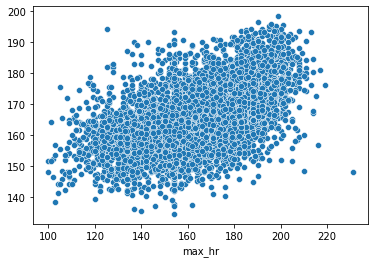

In [93]:
# Scatter
sns.scatterplot(x = y_test, y = y_pred)

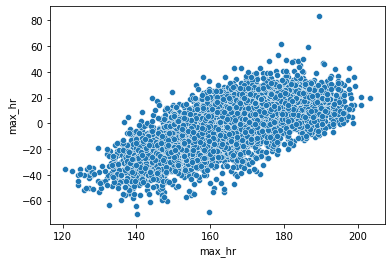

In [94]:
# BLAND-ALTMAN plot
sns.scatterplot(x=((y_pred + y_test) / 2), y=(y_test - y_pred))

# LM vo2_l_min

**RReliafF feature selection for vo2_l_min**

waist                     --> 0.009569

bodyfat                   --> 0.014413

fvc                       --> 0.018686

Aritmia                   --> 0.020000

BMI                       --> 0.021262

fev1                      --> 0.021502

weight Ib->kg             --> 0.022448

resting_sbp               --> 0.032925

height inch->cm           --> 0.034091

resting_dbp               --> 0.035906

resting_hr                --> 0.043977

ageattest                 --> 0.045552

In [71]:
X = df[['waist', 'bodyfat', 'fvc', 'Aritmia', 'BMI', 'fev1', 'weight Ib->kg', 'height inch->cm', 'resting_dbp', 'resting_hr', 'resting_sbp', 'ageattest']]
y = df['vo2_l_min']

In [72]:
X.head()

,waist,bodyfat,fvc,Aritmia,BMI,fev1,weight Ib->kg,height inch->cm,resting_dbp,resting_hr,resting_sbp,ageattest
0,0.333921,0.150895,0.452555,0.0,0.218599,0.320819,0.268406,0.666821,0.525000,0.318182,0.381818,0.322812
1,0.385551,0.300159,0.416058,0.0,0.455874,0.462457,0.291403,0.254439,0.484375,0.456250,0.380273,0.509326
2,0.385551,0.537049,0.416058,0.0,0.393582,0.462457,0.216546,0.208275,0.484375,0.456250,0.380273,0.609756
3,0.409780,0.259484,0.416058,0.0,0.198994,0.462457,0.237614,0.647059,0.425000,0.409091,0.345455,0.552367
4,0.385551,0.300159,0.108029,0.0,0.140066,0.121160,0.016438,0.215686,0.275000,0.318182,0.409091,0.853659


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

# CV
lm = LinearRegression()
scores = cross_validate(lm, X_train, y_train, cv=5, 
                        scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print(1 - scores['test_r2'])
# scores with 95% accuracy
print("RRMSE: %0.2f (+/- %0.2f)" % (1 - scores['test_r2'].mean(), scores['test_r2'].std() * 2))

[0.9752     0.99085017 0.97199526 0.98012859 0.97710082]
RRMSE: 0.98 (+/- 0.01)


In [74]:
reg = lm.fit(X_train, y_train)
reg.coef_

array([ 0.21278919, -0.11696934, -0.63745575,  0.19109964,  1.36310879,
       -0.27938314, -1.07357665,  0.85932926,  0.30930206,  0.34302431,
       -0.14364983, -0.47558896])

In [75]:
y_pred = reg.predict(X_test)
RRMSE_vo2_l_min = 1 - r2_score(y_test, y_pred)
print(RRMSE_vo2_l_min)

0.9772363359022828


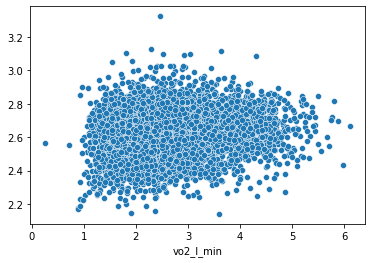

In [76]:
# Scatter
sns.scatterplot(x = y_test, y = y_pred)

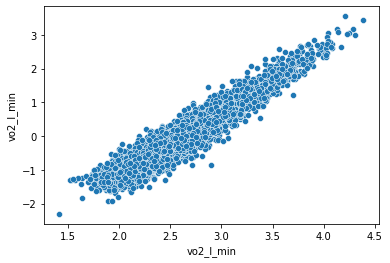

In [79]:
# BLAND-ALTMAN plot
sns.scatterplot(x=((y_pred + y_test) / 2), y=(y_test - y_pred))

# LM vo2_ml_kg_min


**RReliafF feature selection for vo2_ml_kg_min**

bodyfat                   --> 0.010269

waist                     --> 0.013436

fvc                       --> 0.017051

fev1                      --> 0.017201

weight Ib->kg             --> 0.025120

BMI                       --> 0.027779

height inch->cm           --> 0.032523

resting_dbp               --> 0.036281

resting_sbp               --> 0.041045

ageattest                 --> 0.048465

resting_hr                --> 0.050000

In [80]:
X = df[['waist', 'bodyfat', 'fvc', 'BMI', 'fev1', 'weight Ib->kg', 'height inch->cm', 'resting_dbp', 'resting_hr', 'resting_sbp', 'ageattest']]
y = df['vo2_ml_kg_min']

In [81]:
X.head()

,waist,bodyfat,fvc,BMI,fev1,weight Ib->kg,height inch->cm,resting_dbp,resting_hr,resting_sbp,ageattest
0,0.333921,0.150895,0.452555,0.218599,0.320819,0.268406,0.666821,0.525000,0.318182,0.381818,0.322812
1,0.385551,0.300159,0.416058,0.455874,0.462457,0.291403,0.254439,0.484375,0.456250,0.380273,0.509326
2,0.385551,0.537049,0.416058,0.393582,0.462457,0.216546,0.208275,0.484375,0.456250,0.380273,0.609756
3,0.409780,0.259484,0.416058,0.198994,0.462457,0.237614,0.647059,0.425000,0.409091,0.345455,0.552367
4,0.385551,0.300159,0.108029,0.140066,0.121160,0.016438,0.215686,0.275000,0.318182,0.409091,0.853659


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

# CV
lm = LinearRegression()
scores = cross_validate(lm, X_train, y_train, cv=5, 
                        scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print(1 - scores['test_r2'])
# scores with 95% accuracy
print("RRMSE: %0.2f (+/- %0.2f)" % (1 - scores['test_r2'].mean(), scores['test_r2'].std() * 2))

[0.96660276 0.98503153 0.96996955 0.97852473 0.97506641]
RRMSE: 0.98 (+/- 0.01)


In [83]:
reg = lm.fit(X_train, y_train)
reg.coef_

array([  1.82850958,  -4.6705756 ,  -7.70157862,  17.9254313 ,
        -4.29817968, -13.15803103,  10.48502586,   4.51515901,
         6.81021611,  -1.88440833,  -5.92002292])

In [84]:
y_pred = reg.predict(X_test)
RRMSE_vo2_l_min = 1 - r2_score(y_test, y_pred)
print(RRMSE_vo2_l_min)

0.974304541018899


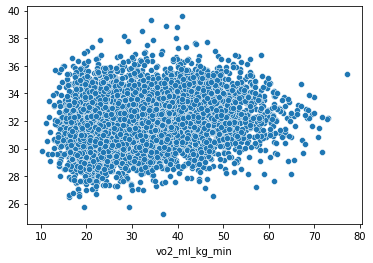

In [85]:
# Scatter
sns.scatterplot(x = y_test, y = y_pred)

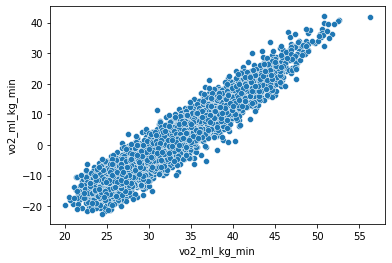

In [86]:
# BLAND-ALTMAN plot
sns.scatterplot(x=((y_pred + y_test) / 2), y=(y_test - y_pred))